# Notebook 1: End-to-End Machine Learning Project

## Introduction

In this notebook we will take a deep dive into machine learning, and investigate some of the steps involved in a prediction task - from setting up an appropriate experimental environment and loadint the initial data set, through to performing a regression analysis by applying a variety of machine learning algorithms to the data.

We have not yet covered all of the techniques which we will use in this notebook, and indeed we will not cover all of them during the course of this module. However, the purpose of this notebook is to give you an overview of what a machine learning project looks like overall. In future classes you will take a look at the  application of algorithms which we will discuss in the lectures in much more detail.

This particular notebook is heavily based on the second chapter of 'Hands-On Machine Learning with Scikit-Learn & Tensorflow' by A. Geron - which is an excellent resource for introducing the practicalities of machine learning.

## Guidelines

- The structure of the code is given to you and you will need to fill in the parts corresponding to each question. 
- Do not modify/erase other parts of the code if you have not been given specific instructions to do so.
- When you are asked to insert code, do so between the areas which begin:
  
  `##########################################################`
  
  `# TO_DO`
  
  `# [your code here]`
   
   And which end:
   
  `# /TO_DO
   ##########################################################`


- When you are asked to comment on the results you should give clear and comprehensible explanations. Write the comments in a 'Code Cell' with a sign `#` at the beginning of each row, and in the areas which begin:

  `# [INSERT YOUR ANSWER HERE]`

## Imports

Please do not change the cell below, you will see a number of imports. All these packages are relevant for the assignment and it is important that you get used to them. You can find more information about them in the respective documentations. The most relevant for this notebook is Scikit-Learn, which is a popular machine learning library, which features various algorithms on classification, regression and clustering. Most algorithms introduced in this course will be implemented in Scikit-Learn:

https://scikit-learn.org/stable/

In [36]:
import numpy as np
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt

## Load Data
For the puposes of illustration in this notebook we will use a modified version of the Boston housing price data set. This version contains 506 samples, each of which consists of 11 features and 1 label of housing price values. The features are:

1. CRIM: per capita crime rate by town.
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town.
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. NOX: nitrogen oxides concentration (parts per 10 million).
6. RM: average number of rooms per dwelling.
7. AGE: proportion of owner-occupied units built prior to 1940.
8. DIS: weighted mean of distances to five Boston employment centres.
9. RAD: index of accessibility to radial highways.
10. TAX: full-value property-tax rate per $10,000.
11. PTRATIO: pupil-teacher ratio by town.

First we set the path for the dataset repository, you should enter your working directory here:
- For MAC use the following way: https://support.apple.com/en-gb/guide/mac-help/mchlp1774/mac#:~:text=On%20your%20Mac%2C%20click%20the,bottom%20of%20the%20Finder%20window.
- For Windows right click on the folder containing the dataset and click on "copy as path"
- For Linux use the following way: https://ubuntuhandbook.org/index.php/2020/05/textual-path-ubuntu-20-04-files/

In [37]:
dirName = r"D:\Buendia\ML Learning\ml_basic\Notebook 1 End to End Project" #TO_DO input the path of the folder for the data files below 
dirName_feats = os.path.join(dirName,'housing_features.csv')
dirName_targs = os.path.join(dirName,'housing_target.csv')
dirName_names = os.path.join(dirName,'housing_names.csv')

We will now load the data into a pandas dataframe using `pd.DataFrame`:

In [38]:
df_housing = pd.read_csv(dirName_feats)

A brief numerical description of dataset can be viewed by the following function:

In [39]:
df_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


And we can take a look at the top 5 rows of the data as follows:

In [40]:
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7


Finally, let's create separate holders for the input and output data:

In [41]:
X=np.genfromtxt(dirName_feats,delimiter=',',skip_header=1)
y=np.genfromtxt(dirName_targs,delimiter=',',skip_header=1)
names=np.genfromtxt(dirName_names, dtype='str',skip_header=1)

## Dataset Preprocessing

Now we will take a look at different features. Please note that these steps are not required in predicting Boston housing prices, but they are here just to give you some insights into the various types of data.

### _Missing Data Items_

First let's synthetically randomly replace some data entries with `nan`:

In [42]:
np.random.seed(42)

X_new = X.copy()
mask = np.random.randint(0, 2, size=X.shape).astype(bool)
X_new[mask] = np.nan

Now try to replacing the missing values with the mean value of the corresponding column:

In [43]:
#imp = SimpleImputer(strategy='mean')
#X_replace_with_median = imp.fit_transform(X_new)

__Task:__  
Now please try other strategies (for example, replacing missing values with the median or the most frequent value).

*Hint: check the parameter 'strategy' in the `sklearn.impute.SimpleImputer` module. You may also find `help(SimpleImputer)` helpful.*

In [44]:
########################################################
# TO_DO
#[your code here]
imp = SimpleImputer(strategy='median')
X_replace_with_median = imp.fit_transform(X_new)

# /TO_DO
########################################################

### _Training and Test Data_

The dataset is generally split into two parts: the training set and the test set. We use the training set for training a model, then apply the trained model to the test set, in order to evaluate the performance of our model.

First let's split the data (randomly):

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### _Standardisation of the Data Set_

For many machiner learning algorithms very different models can be learned depedning on the scale of the input data. Quite often this can give misleading results, so standardisation of a data set is a very common technique which is applied prior to model training. The standardisation process removes the mean and scales each feature column to unit variance:

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Regression

Now that we have transformed our data into a more useable format, we can begin the regression task.

This section solves the regression problem with different methods. We also compute mean squared error (MSE) and mean absolute error (MAE) for future use.

First we create a naive baseline for compariosn, and predict the housing prices using the average values of the output data of the training samples:

In [47]:
y_avg = np.ones(len(y_test)) * np.mean(y_train)

mse_avg = mean_squared_error(y_test, y_avg)
mae_avg = mean_absolute_error(y_test, y_avg)

### _Linear Regression_

Using the Scikit-Learn `LinearRegression` function we perform linear regression, then we compute the MSE's and MAE's:

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_lr)
mae_lr = mean_absolute_error(y_test, y_lr)

__Task:__  
Now repeat this analysis, but this time using only one feature at a time as input data. Compute the MSE's and MAE's:

In [77]:
n_sample, n_feature = X_train.shape

mse_lr_per_feature = []
mae_lr_per_feature = []

########################################################
# TO_DO
#[your code here]
for i in range(0, n_feature):
    X_train_one_feat = X_train[:, i]  # 所有行的第 n 列
    print(i)
    X_train_one_feat = X_train[:, i].reshape(-1, 1)  # 转为 (n_samples, 1)
    X_test_one_feat = X_test[:, i].reshape(-1, 1)
    lr_one_feat = LinearRegression()
    lr_one_feat.fit(X_train_one_feat, y_train)
    y_lr_one_feat = lr_one_feat.predict(X_test_one_feat)

    mse_lr_one_feat = mean_squared_error(y_test, y_lr_one_feat)
    mae_lr_one_feat = mean_absolute_error(y_test, y_lr_one_feat)

    mse_lr_per_feature.append(mse_lr_one_feat)
    mae_lr_per_feature.append(mae_lr_one_feat)

print(mse_lr_per_feature)
print(mae_lr_per_feature)

# /TO_DO
########################################################

0
1
2
3
4
5
6
7
8
9
10
[61.69413745566079, 54.34745382306919, 53.06374453858558, 74.73440525330909, 58.2853259323976, 46.144775347317264, 55.732581620675994, 67.95691932803948, 65.65174251079492, 55.638029864802746, 49.976377884836964]
[5.6310516955563505, 5.3093455970113075, 5.249579030981406, 6.219631643002028, 5.695364590575605, 4.478335832064149, 5.335749332662091, 5.967846118518974, 5.824226134142758, 5.3187163347134865, 5.212479681416376]


### _k Nearest Neighbor (kNN) Regression_

Using the Scikit-Learn `KNeighborsRegressor` function we perform regression, setting the `n_neigbours` hyperparamter to 3:

In [ ]:
n_neighbors = 2
neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
neigh.fit(X_train, y_train)

y_neigh = neigh.predict(X_test)

mse_neigh = np.sqrt(mean_squared_error(y_test, y_neigh))
mae_neigh = mean_absolute_error(y_test, y_neigh)
print('MSE Neigh 4: {}'.format(mse_neigh))
print('MAE Neigh 4: {}'.format(mae_neigh))

__Task:__  
Now repeat the analysis, but this time use different settings of the number of nearest neighbours. Compute the MSE's and MAE's.

In [84]:
mse_neigh_other_num = []
mae_neigh_other_num = []

########################################################
# TO_DO
#[your code here]

for i in range(1, 11):
    n_neighbors = i
    neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
    neigh.fit(X_train, y_train)

    y_neigh = neigh.predict(X_test)

    mse_neigh = np.sqrt(mean_squared_error(y_test, y_neigh))
    mae_neigh = mean_absolute_error(y_test, y_neigh)
    print('MSE Neigh {}: {}'.format(i, mse_neigh))
    print('MAE Neigh {}: {}'.format(i,mae_neigh))

    mse_neigh_other_num.append(mse_neigh)
    mae_neigh_other_num.append(mae_neigh)
# /TO_DO
########################################################

MSE Neigh 1: 5.089213892067781
MAE Neigh 1: 3.1617647058823537
MSE Neigh 2: 5.044208968475341
MAE Neigh 2: 3.01421568627451
MSE Neigh 3: 5.158835515694956
MAE Neigh 3: 2.991176470588235
MSE Neigh 4: 5.274484804317895
MAE Neigh 4: 3.041911764705882
MSE Neigh 5: 5.422565777179945
MAE Neigh 5: 3.05764705882353
MSE Neigh 6: 5.5024482073446
MAE Neigh 6: 3.1446078431372553
MSE Neigh 7: 5.448807924961316
MAE Neigh 7: 3.129971988795519
MSE Neigh 8: 5.49468186513283
MAE Neigh 8: 3.175980392156863
MSE Neigh 9: 5.61941026496325
MAE Neigh 9: 3.2364923747276686
MSE Neigh 10: 5.5828895638686005
MAE Neigh 10: 3.195196078431372


### _Gradient Boosting Regression_

Finally, using the Scikit-learn `GradientBoostingRegressor` function we perform regression. A number of hyperparameters can be specified in the `sklearn.ensemble.GradientBoostingRegressor` module. Here we set `loss = 'quantile'` with `alpha = 0.95`:

In [ ]:
gb = GradientBoostingRegressor(loss='squared_error', alpha=0.75,
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)
gb.fit(X_train, y_train)

y_gb = gb.predict(X_test)

mse_gb = mean_squared_error(y_test, y_gb)
mae_gb = mean_absolute_error(y_test, y_gb)

__Task:__  
Now repeat the analysis, try different types of loss functions as well as other differemt types of hyperparameter settings. Compare the performances with MSEs and MAEs.

*Hint: you may find the documentation helpful. To view the documentation, use the following command `help(GradientBoostingRegressor)`.*

In [ ]:
losses = ['squared_error', 'quantile']
alphas = np.linspace(0.7, 0.9, 5)

mse_gb_other_param = np.empty([len(losses), len(alphas)])
mae_gb_other_param = np.empty([len(losses), len(alphas)])

########################################################
# TO_DO
#[your code here]
for i in range(0, len(losses)):
    for j in range(0, len(alphas)):
        gb = GradientBoostingRegressor(loss=losses[i], alpha=alphas[j],
                                n_estimators=250, max_depth=3,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)
        gb.fit(X_train, y_train)

        y_gb = gb.predict(X_test)

        mse_gb = mean_squared_error(y_test, y_gb)
        mae_gb = mean_absolute_error(y_test, y_gb)

        mse_gb_other_param[i][j] = mse_gb
        mae_gb_other_param[i][j] = mae_gb

        print('mse with losses: {}, alphas: {} is {}'.format(losses[i], alphas[j], mse_gb))
        print('mae with losses: {}, alphas: {} is {}'.format(losses[i], alphas[j], mae_gb))

# /TO_DO
########################################################


mse with losses: squared_error, alphas: 0.7 is 8.013752861667445
mae with losses: squared_error, alphas: 0.7 is 2.0013896445083863
mse with losses: squared_error, alphas: 0.75 is 8.013752861667442
mae with losses: squared_error, alphas: 0.75 is 2.001389644508386
mse with losses: squared_error, alphas: 0.8 is 8.013752861667445
mae with losses: squared_error, alphas: 0.8 is 2.001389644508386
mse with losses: squared_error, alphas: 0.85 is 8.013752861667445
mae with losses: squared_error, alphas: 0.85 is 2.0013896445083863
mse with losses: squared_error, alphas: 0.9 is 8.013752861667449
mae with losses: squared_error, alphas: 0.9 is 2.0013896445083867
mse with losses: quantile, alphas: 0.7 is 11.896198324667452
mae with losses: quantile, alphas: 0.7 is 2.333541094104319
mse with losses: quantile, alphas: 0.75 is 9.39824989534171
mae with losses: quantile, alphas: 0.75 is 2.1539597412464966
mse with losses: quantile, alphas: 0.8 is 10.620353127358277
mae with losses: quantile, alphas: 0.8 

### _Compare Performances_

This section compares the predictions using different algorithms. We first create some scatter plots to visualise the differences between actual values and the predicted values. 

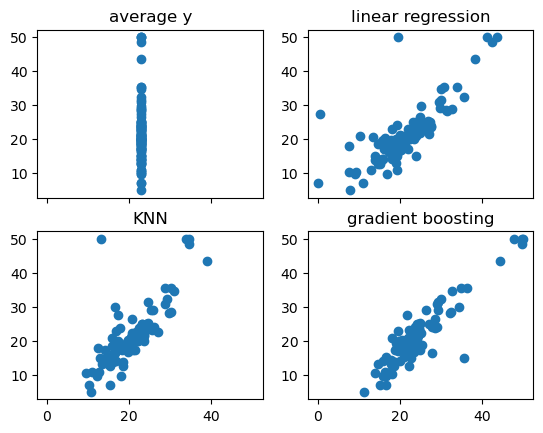

In [87]:
fig, axes = plt.subplots(2, 2, sharex=True)

mse = [mse_avg, mse_lr, mse_neigh, mse_gb]
mae = [mae_avg, mae_lr, mae_neigh, mae_gb]

titles = ['average y', 'linear regression', 'KNN', 'gradient boosting']
predictions = [y_avg, y_lr, y_neigh, y_gb]

for counter, ax in enumerate(axes.flat):
    ax.scatter(predictions[counter], y_test)
    ax.set_title(titles[counter])

plt.show()

Next we view the MAE and MSE of the predicted values, consolidated using `pandas.DataFrame()`:

In [88]:
errors = pd.DataFrame.from_dict({'MAE': [mae_avg, mae_lr, mae_neigh, mae_gb],
                                 'MSE': [mse_avg, mse_lr, mse_neigh, mse_gb]},
                                 orient='index', columns=titles)
errors

,average y,linear regression,KNN,gradient boosting
MAE,6.255844,3.343341,3.195196,3.284815
MSE,75.045430,29.029078,5.582890,19.977274


__Task:__  
Compare the performances with your results using different parameters in KNN and Gradient Boosting.

Did different hyperparameter settings in these algorithms have any effects on the accuracy of our predictions? 

Could you come up with a method to automatically choose the value of these hyperparameters?

In [89]:
# [INSERT YOUR ANSWER HERE]
errors = pd.DataFrame.from_dict({'MAE': [mae_avg, mae_lr, mae_neigh, mae_gb],
                                 'MSE': [mse_avg, mse_lr, mse_neigh, mse_gb]},
                                 orient='index', columns=titles)
errors

,average y,linear regression,KNN,gradient boosting
MAE,6.255844,3.343341,3.195196,3.284815
MSE,75.045430,29.029078,5.582890,19.977274
